<a href="https://colab.research.google.com/github/charann90/Mobile-Price-Range-Prediction/blob/main/Mobile_price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Range Prediction
> Predicting mobile price range based on its features set.



# Business Context

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.

In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Dataset Description


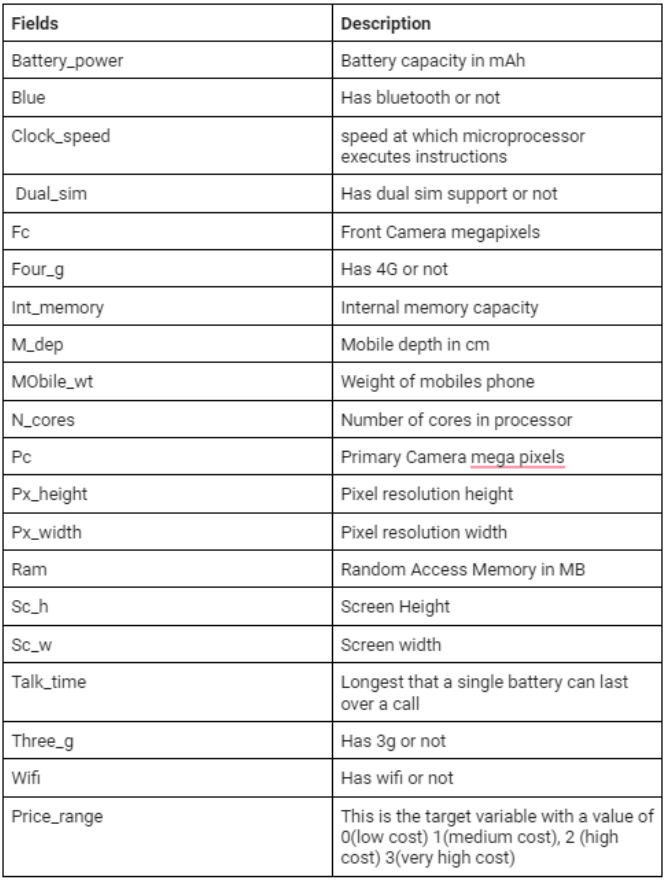

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Data uploading

In [ ]:
df=pd.read_csv('/content/data_mobile_price_range.csv')

In [ ]:
df.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


# Data Wrangling

In [ ]:
#checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The dataset has no null values

In [ ]:
#checking the data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [ ]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

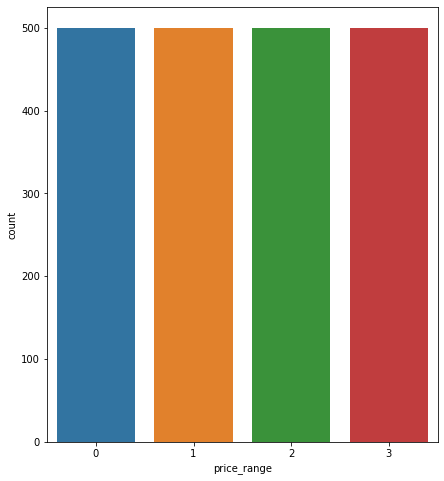

In [ ]:
plt.figure(figsize=(7,8))
sns.countplot(df['price_range'])

We have equal frequencies of all the price range

In [ ]:
list(df.columns.values)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


here both px_height and sc_w has zero values, so there is a need of replacing or droping the zero values 

In [ ]:
#replacing mean value 
df['px_height'][df[df['px_height']==0].index]=df['px_height'].mean()
df['sc_w'][df[df['sc_w']==0].index]=df['sc_w'].mean()

In [ ]:
#Getting the summary of all the numbers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


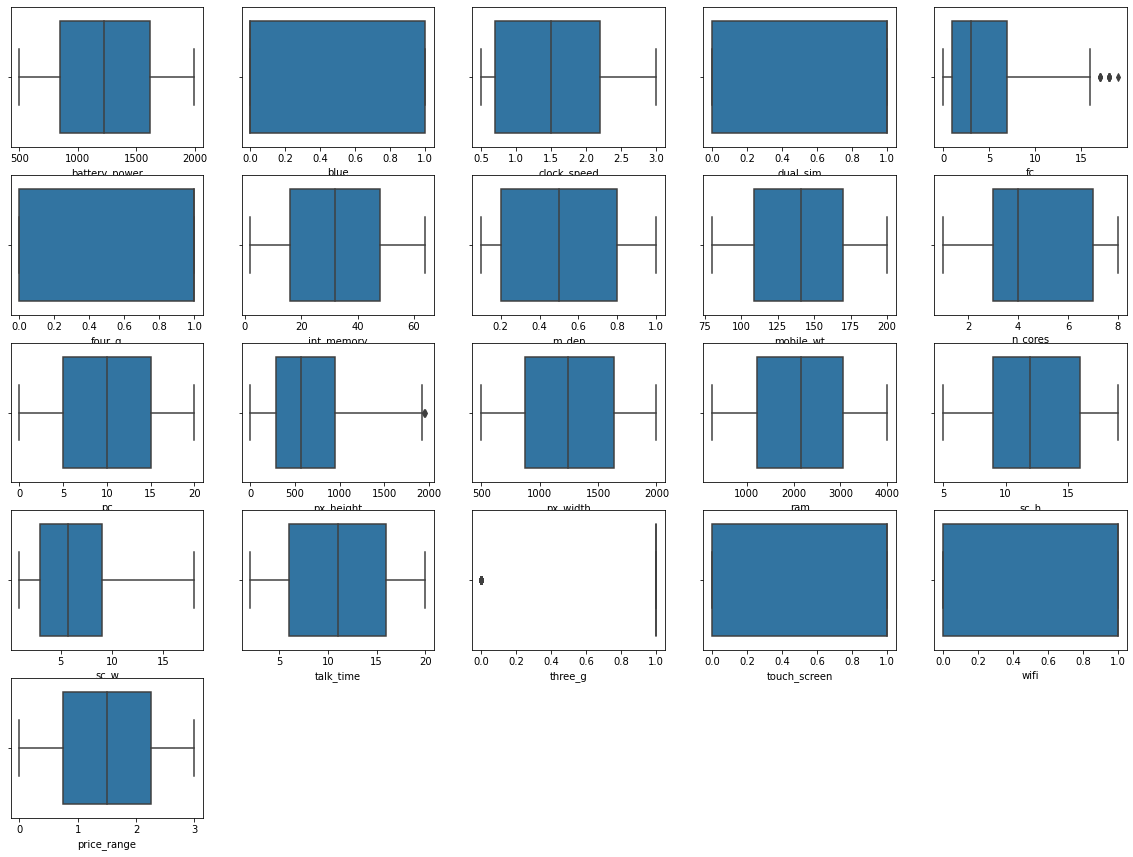

In [ ]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(list(df.columns.values)):
  plt.subplot(6,5,index+1)
  sns.boxplot(df[i])
  


There are not much outliers

1.   In 'px_height' 1 possible outlier was highlighted but after
examination it was observerd to be with in reason.
2.   In 'fc' few observervations were out of bound but normal to have high megapixel for experimental or emerging technology.




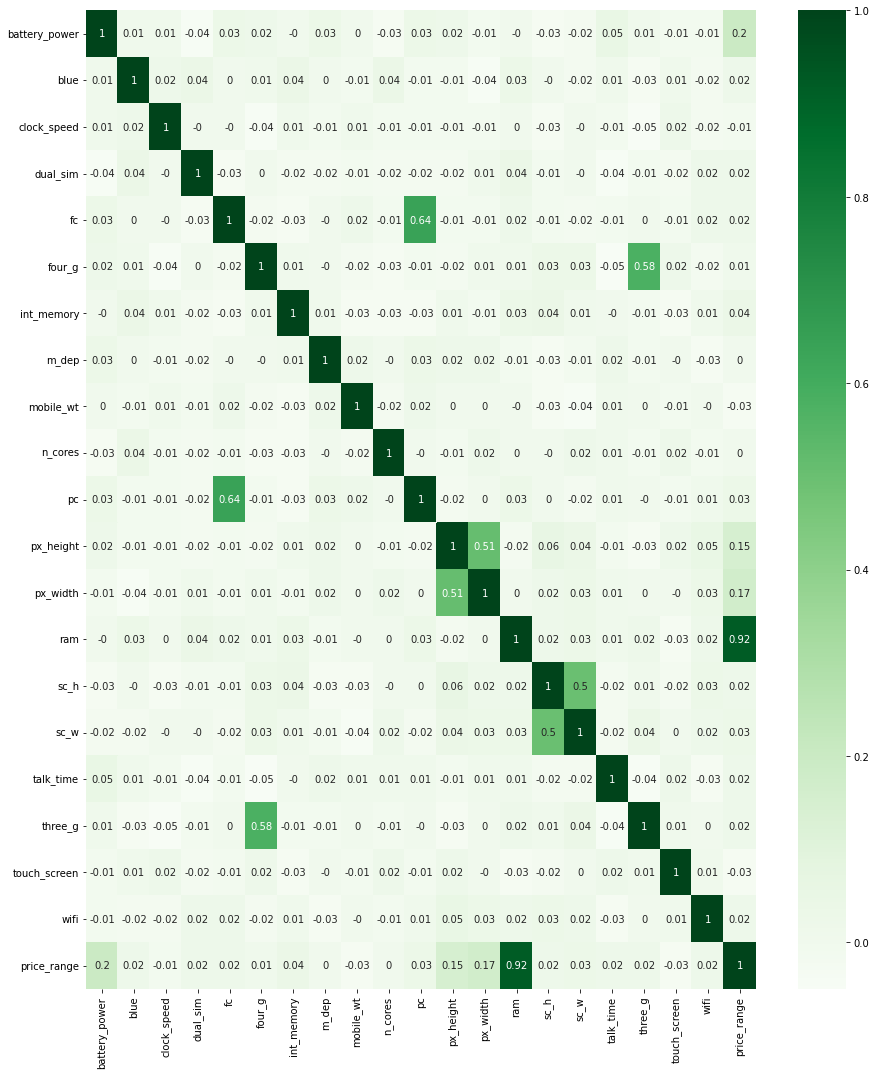

In [ ]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(15,18))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

Here Ram has highest correlation with price range. So except 'battery_power,'px_height','px_width','ram'and binary value columns, we can drop the remaining fetures as the dependency of pricing is least on other factors.

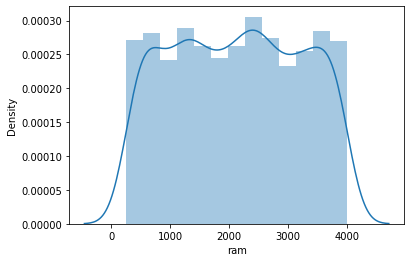

In [ ]:
#plotting distplot for ram to find outfrequency distribution
sns.distplot(df['ram'])

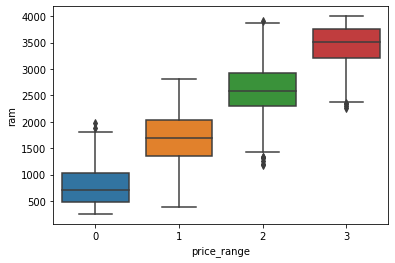

In [ ]:
#plotting boxplot for columns ram and price range
sns.boxplot(x='price_range', y='ram', data=df)

In [ ]:
numeric_features = df.describe().columns

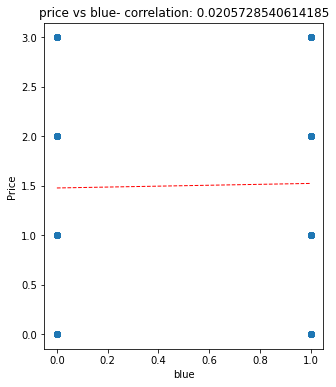

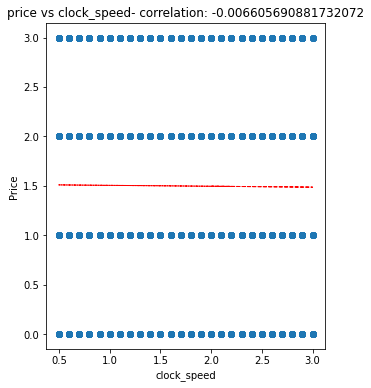

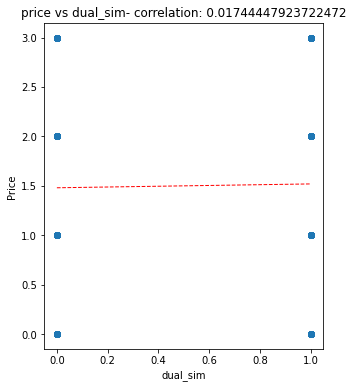

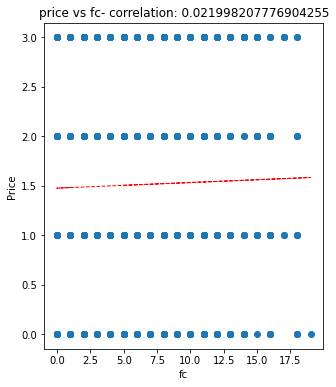

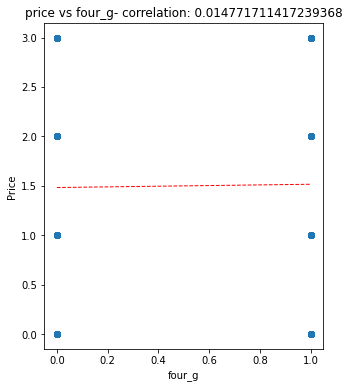

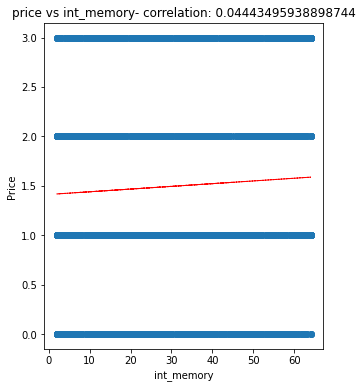

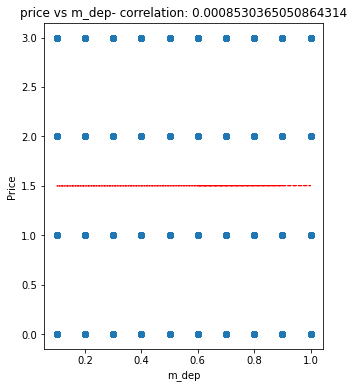

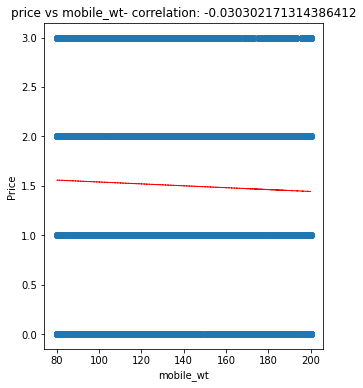

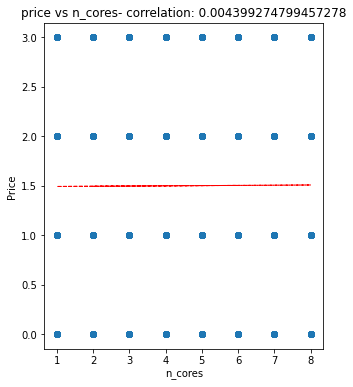

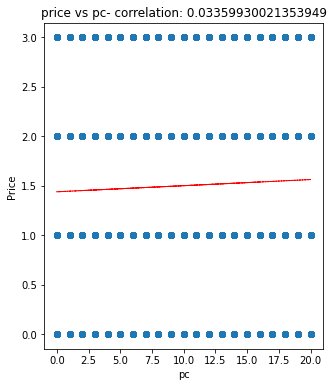

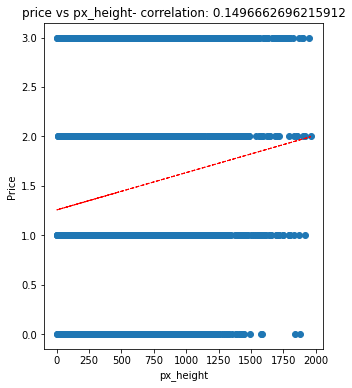

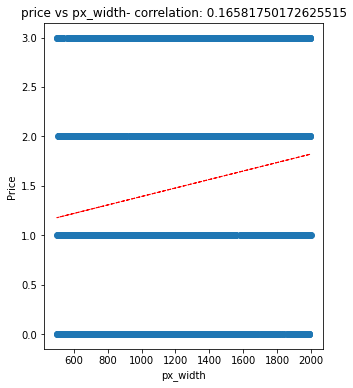

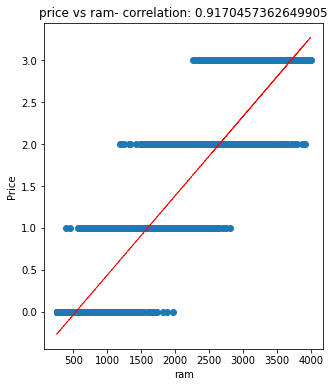

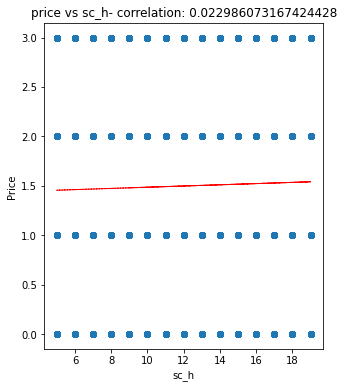

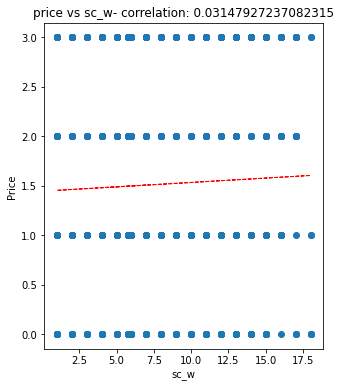

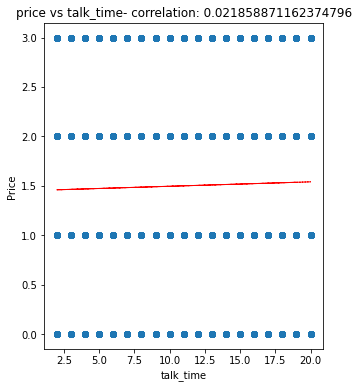

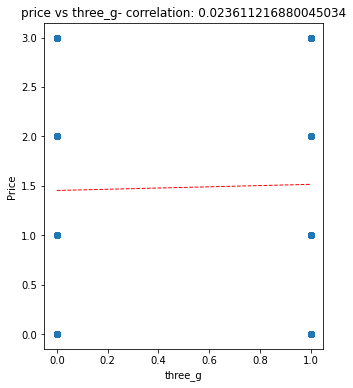

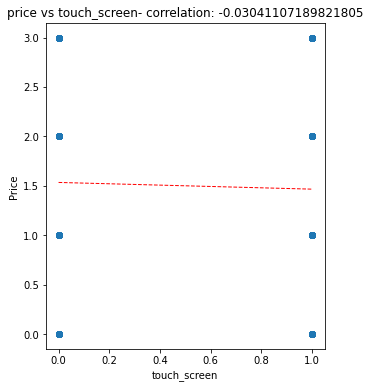

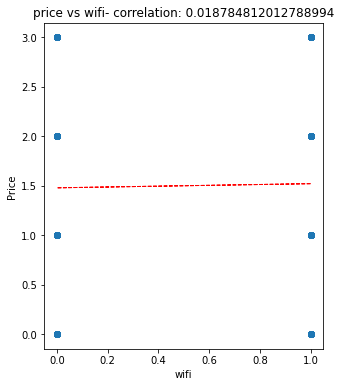

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(5,6))
    ax = fig.gca()
    feature = df[col]
    i = df['price_range']
    correlation = feature.corr(i)
    plt.scatter(x=feature, y=i)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price_range'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Bar Plot of all coloumns except univariate columns & 'price_range'

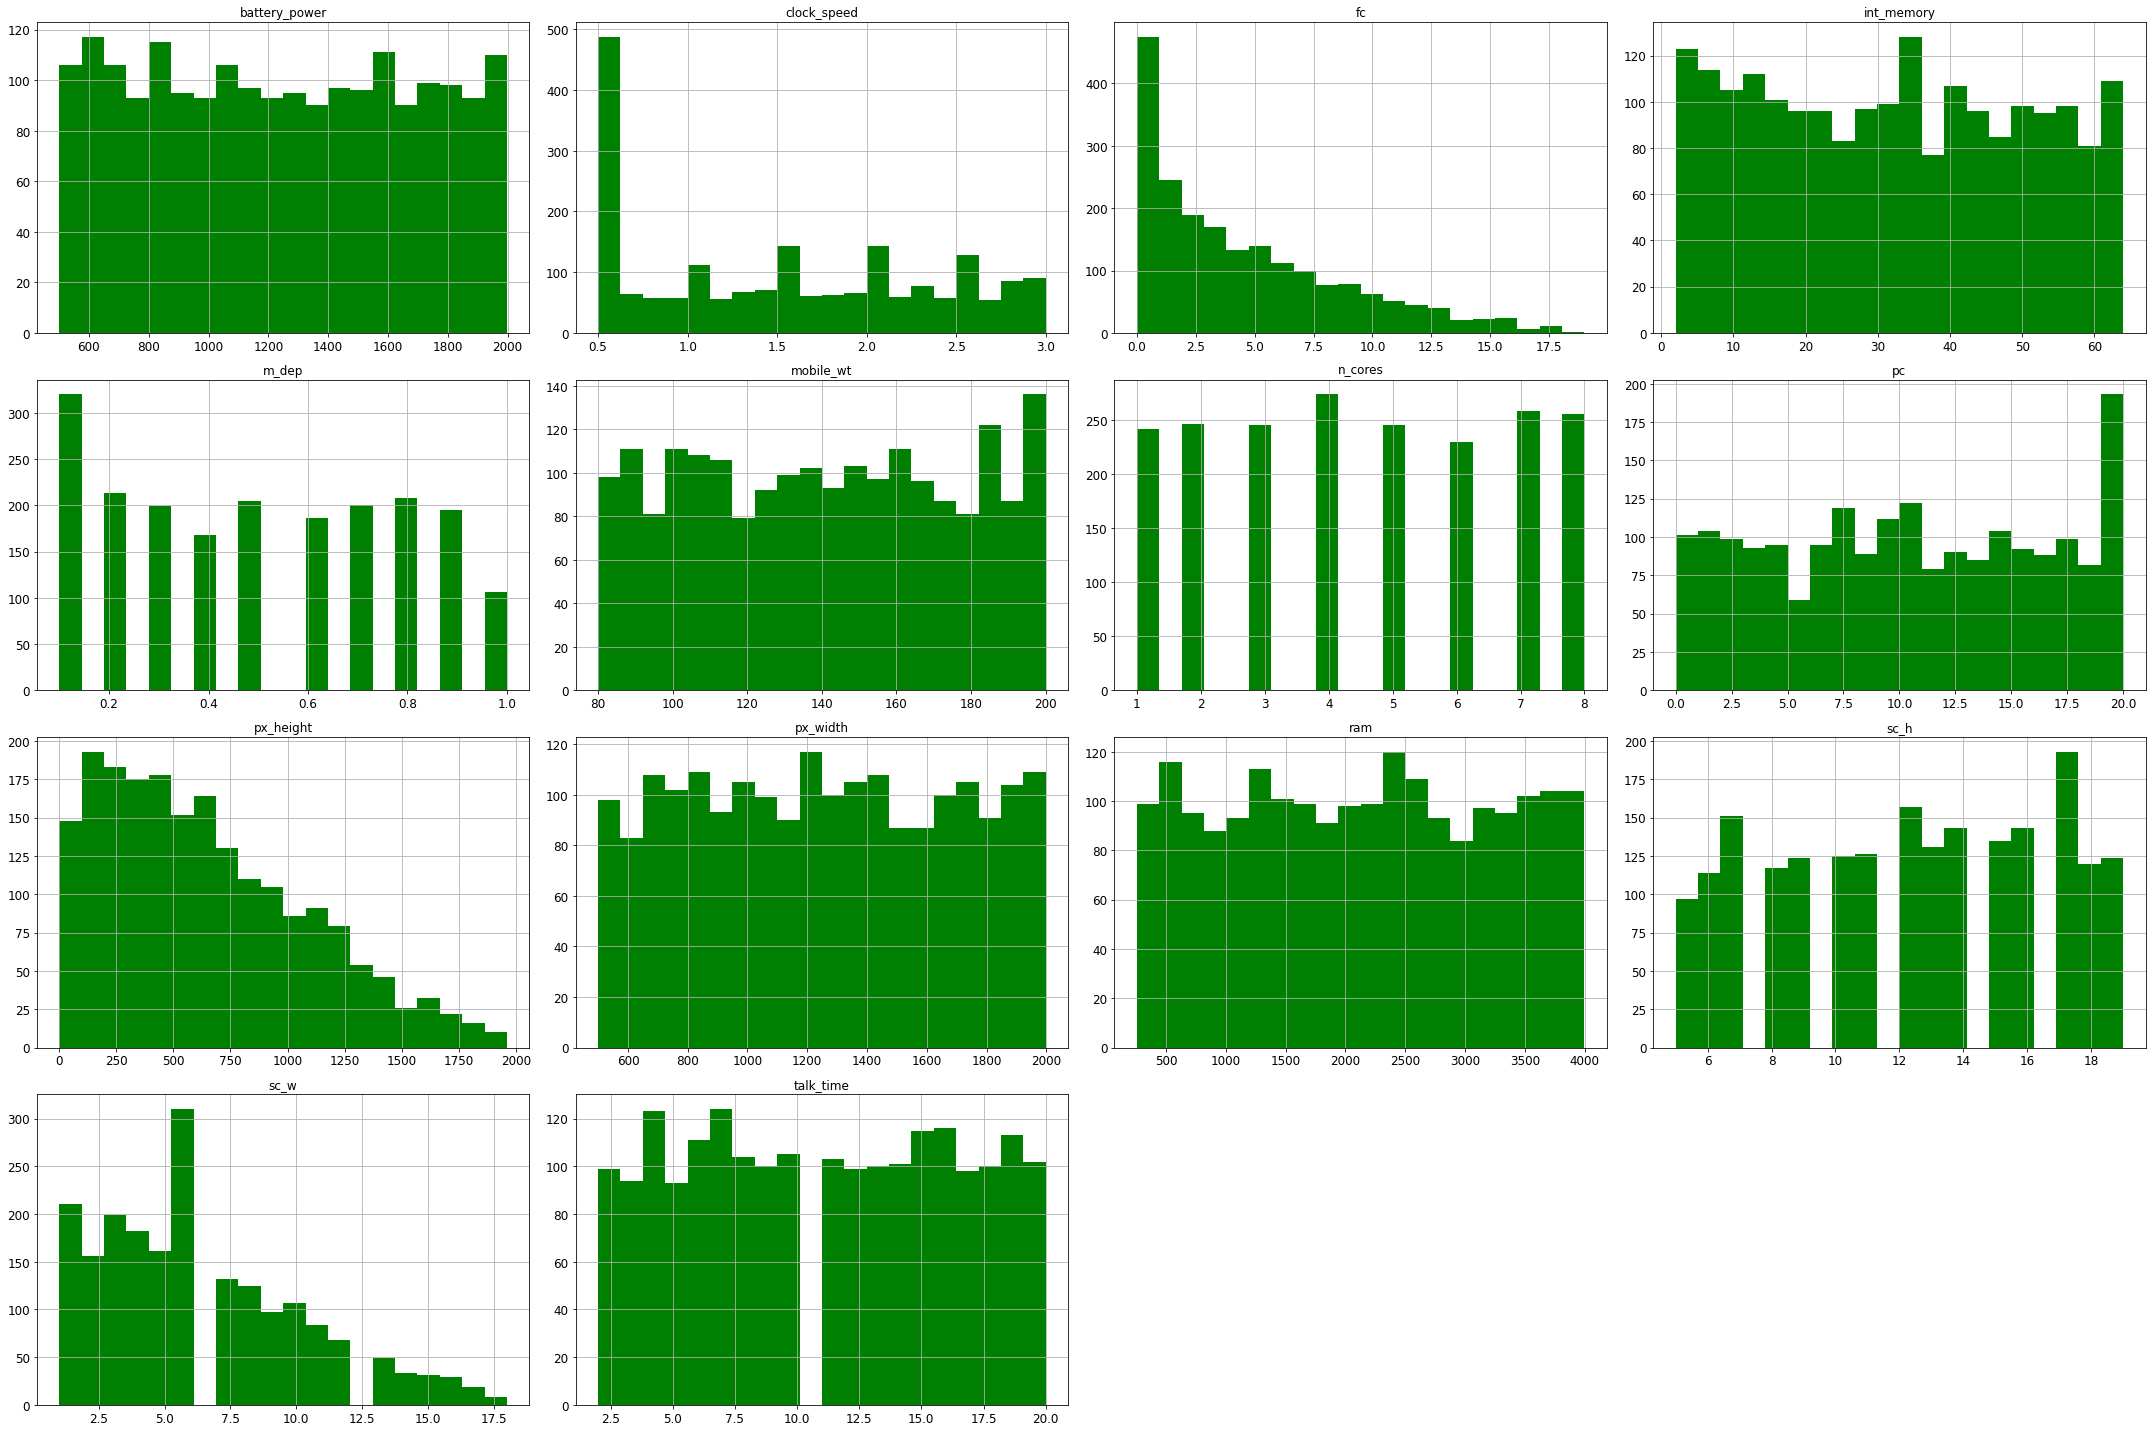

In [ ]:
col = ['battery_power','clock_speed','fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
df.hist(bins = 20, figsize = (30,20),color='green', column = col, ylabelsize = 12, xlabelsize = 12)
plt.tight_layout()
plt.show()

*pie plot for univariate*

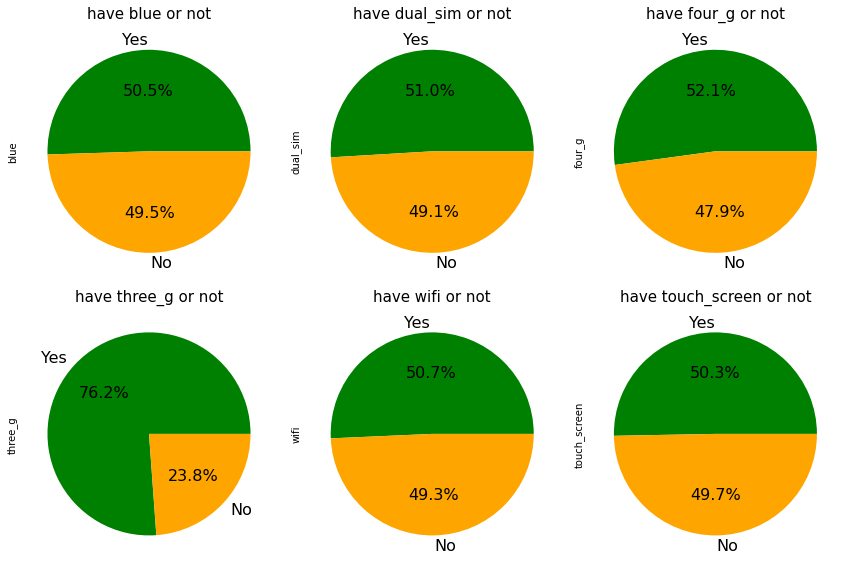

In [ ]:
#plotting pie char for binary categorical variables
plt.figure(figsize=(12,8))
rows=2
columns=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for item in var_list: 
 plt.subplot(rows,columns,count)
 df[item].value_counts().plot.pie(autopct='%.1f%%',labels=labels,colors = ['green', 'orange'],fontsize=16)
 plt.title(f'have {item} or not',fontsize=15)
 plt.tight_layout()
 count=count+1

**observations**


*   'ram' and 'price_range' is highly correlated


> More RAM = Higher price



*   'three_g' and 'four_g' are moderately correlated
*   'pc'(primary camera) and 'fc'(front camera) are moderately correlated.





*   'px_height' and 'px_width' are moderately correlated





*   'sc_h' & 'sc_w' (screen height & screen width) is moderately correlated.





# Machine Learning

In [ ]:
#converting screen width and height to scr_dmi
df['scr_dmi']=round(df['sc_h']*df['sc_w'],1)
df.drop(['sc_h','sc_w'],axis=1,inplace=True)

In [ ]:
#converting pixel width and height to PPI.
df['ppi']=round(df['px_height']*df['px_width'],1)
df.drop(['px_height','px_width'],axis=1,inplace=True)

In [ ]:
#preparing data for test train
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [ ]:
#train test splitting
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)
#scaling
scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [ ]:
x_train.shape

(1600, 18)

In [ ]:
x_test.shape

(400, 18)

In [ ]:
#creating dataframe to store coefficients
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
importances = pd.DataFrame(data={'Attribute': x_train.columns,
                                'Importance': model.coef_[0]
})
#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=True)

In [ ]:
importances

,Attribute,Importance
11,ram,-10.499555
0,battery_power,-2.627274
16,ppi,-2.510231
13,three_g,-0.128982
6,int_memory,-0.096808
4,fc,-0.092582
17,scr_dmi,-0.085076
10,pc,-0.069503
9,n_cores,-0.051443
12,talk_time,-0.020099


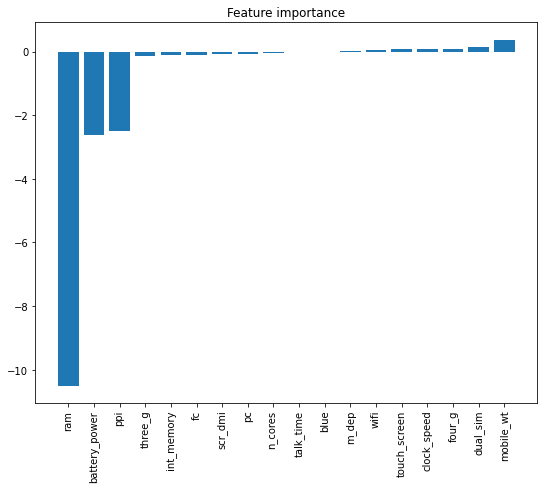

In [ ]:
#Visualising feature importance by their coefficient values
plt.figure(figsize=(9,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#dropping irrelevent columns
df.drop(['blue','m_dep','touch_screen','wifi'],axis=1,inplace=True)

# logistic regression

In [ ]:
#defining a variable for logistic regression
clf= LogisticRegression(fit_intercept=True, max_iter=10000,solver="liblinear")
clf.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
test_class_pred=clf.predict(x_test_scaled)
train_class_pred=clf.predict(x_train_scaled)

In [ ]:
test_class_pred1=clf.predict_proba(x_test_scaled)

In [ ]:
test_class_pred[:10]

array([0, 2, 2, 3, 1, 2, 2, 0, 3, 1])

In [ ]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8425
The accuracy on test data is  0.845


[[105   0   0   0]
 [ 13  56  22   0]
 [  0  16  65  11]
 [  0   0   0 112]]


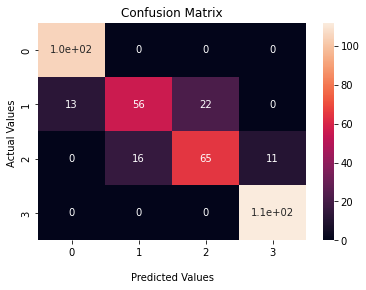

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[393   2   0   0]
 [ 42 286  81   0]
 [  0  70 288  50]
 [  0   0   7 381]]


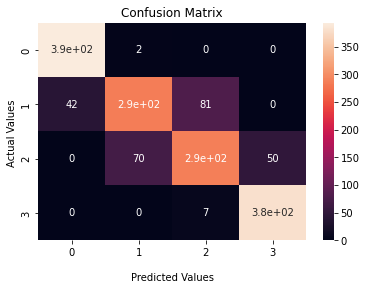

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       105
           1       0.78      0.62      0.69        91
           2       0.75      0.71      0.73        92
           3       0.91      1.00      0.95       112

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       395
           1       0.80      0.70      0.75       409
           2       0.77      0.71      0.73       408
           3       0.88      0.98      0.93       388

    accuracy                           0.84      1600
   macro avg       0.84      0.85      0.84      1600
weighted avg       0.84      0.84      0.84      1600



# Cross validation and hyperparameter tuning on Logistic Regression

In [ ]:
#Tuning parameters 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 0.1],
    'solver' : ['newton-cg','liblinear'],
    'max_iter' : [10, 50, 100,1000]
    }
]


In [ ]:
#Parameter fitted into GridSearch 
log_clf = GridSearchCV(clf, param_grid = param_grid, cv =3, verbose=True, n_jobs=-1, scoring='accuracy', error_score=0)

In [ ]:
best_clf=log_clf.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [ ]:
best_clf.best_params_

{'C': 1.0, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}

In [ ]:
best_clf.best_score_

0.9275026760639258

In [ ]:
cv_accuracy= cross_val_score(best_clf, x_train, y_train,scoring='accuracy',cv=5)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
print(f'accuracy of model with cross validation is {cv_accuracy[0]}')

accuracy of model with cross validation is 0.934375


In [ ]:
test_grid_predictions = best_clf.predict(x_test)

In [ ]:
train_grid_predictions = best_clf.predict(x_train)

In [ ]:
train_accuracy = accuracy_score(train_grid_predictions,y_train)
test_accuracy = accuracy_score(test_grid_predictions,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.95125
The accuracy on test data is  0.9225


In [ ]:
#Function to visualise AUC-ROC Curve

def plot_auc_roc(a,b):
  
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(a, b[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(15,10))
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
  plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label= ((f'0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='orange', label=((f'1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label=((f'2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='green', label=((f'3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass AUC ROC curve',size = 20)
  plt.xlabel('False Positive',size=15)
  plt.ylabel('True Positive',size=15)
  plt.legend(loc='best')
     

In [ ]:
#Function to plot roc for the input model
def print_roc(a_model, flag ='roc', scale = 0) :
  if scale == 1 :
    model_pred_prob = a_model.predict_proba(x_test_scaled)
  
  else :  
    model_pred_prob = a_model.predict_proba(x_test)

  if flag == 'roc' :
    plot_auc_roc(y_test,model_pred_prob)
     

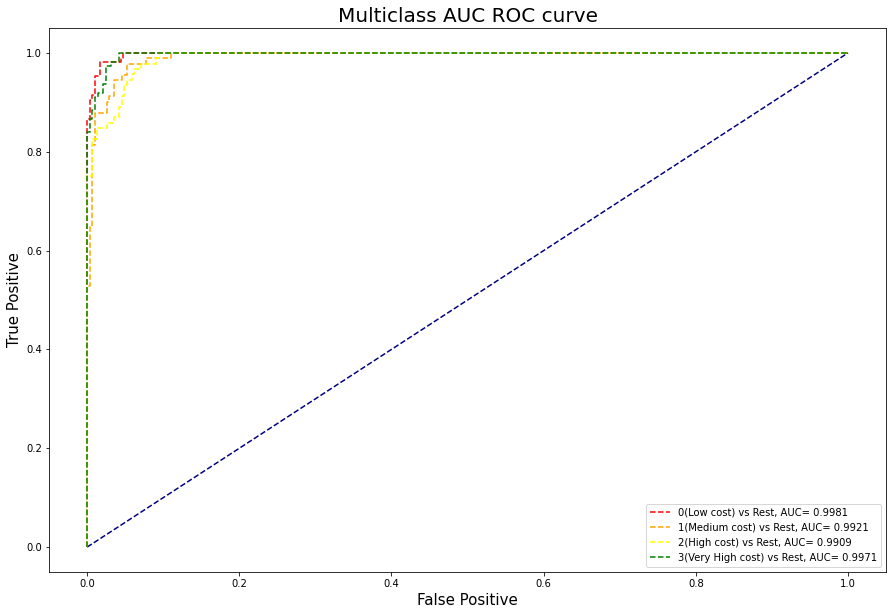

In [ ]:
print_roc(best_clf,'roc')



*   Accuracy is improved after Cross validation and tuning
*   Test accuracy is 92.25 and train accuracy is 95.12



# Random forest classifier

We choose to go with Random Forest intead of decission tree because it avoids over fitting nature of decission tree.



In [ ]:
#defining a variable for random forest classifier
clf1= RandomForestClassifier()
clf1.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
test_class_pred=clf1.predict(x_test_scaled)
train_class_pred=clf1.predict(x_train_scaled)

In [ ]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [ ]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.88


[[101   4   0   0]
 [  6  78   7   0]
 [  0  10  75   7]
 [  0   0  14  98]]


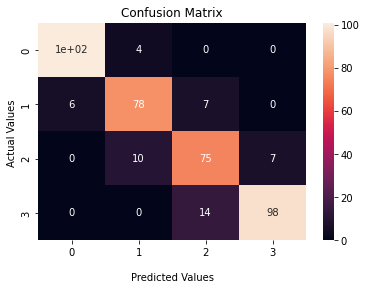

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


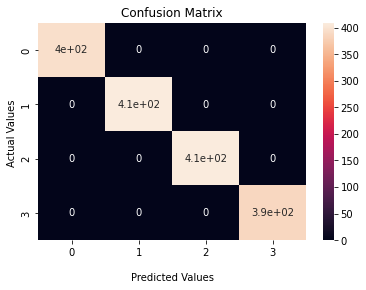

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.86      0.85        91
           2       0.78      0.82      0.80        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Cross validation and hyperparameter tuning on Random Forest Classifier

Tuning

In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))

In [ ]:
# Number of trees
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Grid search
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='accuracy')

rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=100)

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [ ]:
rf_grid.best_score_

0.8037373545732001

Cross validation

In [ ]:
cv_accuracy= cross_val_score(rf_grid, x_train, y_train,scoring='accuracy',cv=3)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_

In [ ]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.8370786516853933


In [ ]:
test_grid_predictions = rf_grid.predict(x_test)

In [ ]:
train_grid_predictions = rf_grid.predict(x_train)

In [ ]:
train_accuracy = accuracy_score(train_grid_predictions,y_train)
test_accuracy = accuracy_score(test_grid_predictions,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.84125
The accuracy on test data is  0.825


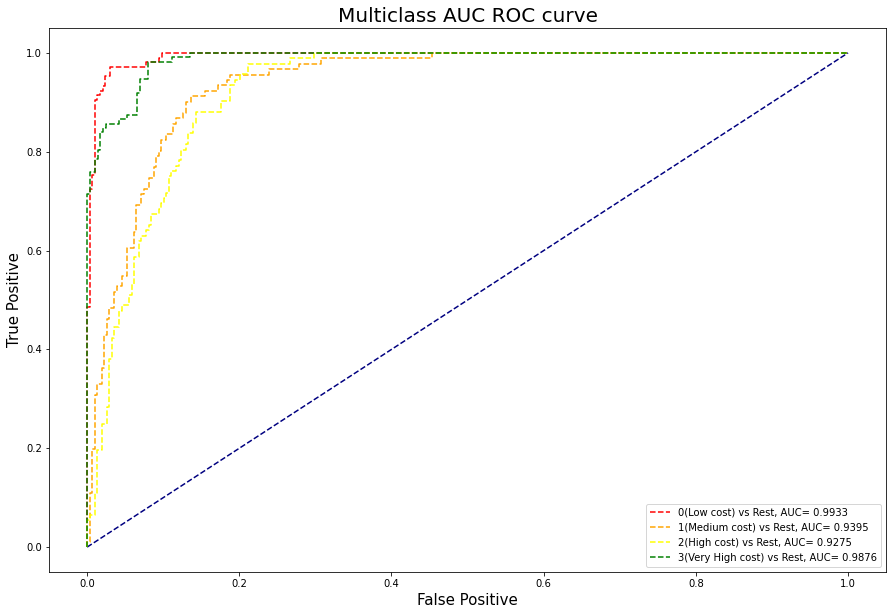

In [ ]:
print_roc(rf_grid,'roc')



*   Before cross validation the accuracy on train data was 100 percent may be due to overfitting
*   After hyperparametr tuning and cross validation accuracy on test data is 82.5 and accuracy on train data is 84.12


*   Prediction accuracy on price range 1  and 2 is less compared to 0 and 3





# SVM

In [ ]:
#defing a variable for svm
svm_model=SVC(probability=True, random_state=99)
svm_model.fit(x_train_scaled,y_train)

SVC(probability=True, random_state=99)

In [ ]:
test_class_pred=svm_model.predict(x_test_scaled)
train_class_pred=svm_model.predict(x_train_scaled)

In [ ]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.973125
The accuracy on test data is  0.87


[[98  7  0  0]
 [ 7 77  7  0]
 [ 0 11 76  5]
 [ 0  0 15 97]]


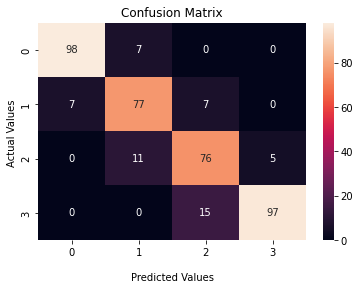

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[388   7   0   0]
 [  4 401   4   0]
 [  0  10 396   2]
 [  0   0  16 372]]


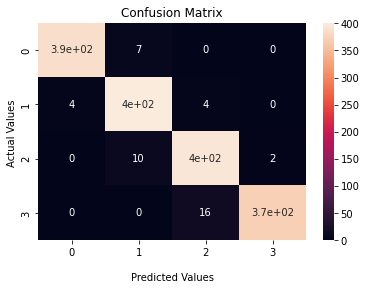

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       105
           1       0.81      0.85      0.83        91
           2       0.78      0.83      0.80        92
           3       0.95      0.87      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       395
           1       0.96      0.98      0.97       409
           2       0.95      0.97      0.96       408
           3       0.99      0.96      0.98       388

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



# Cross validation and hyperparameter tuning on SVM

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

In [ ]:
best_grid=svm_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
best_grid.best_estimator_

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [ ]:
best_grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [ ]:
best_grid.best_score_

0.9200000000000002

In [ ]:
test_grid_predictions = best_grid.predict(x_test_scaled)

In [ ]:
train_grid_predictions = best_grid.predict(x_train_scaled)

In [ ]:
train_accuracy = accuracy_score(train_grid_predictions,y_train)
test_accuracy = accuracy_score(test_grid_predictions,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.918125
The accuracy on test data is  0.9175


In [ ]:
print(classification_report(y_test,test_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.87      0.86      0.86        92
           3       0.94      0.94      0.94       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
print(classification_report(y_train,train_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       395
           1       0.90      0.90      0.90       409
           2       0.88      0.88      0.88       408
           3       0.94      0.94      0.94       388

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [ ]:
cv_accuracy= cross_val_score(best_grid, x_train_scaled, y_train,scoring='accuracy',cv=5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.9125


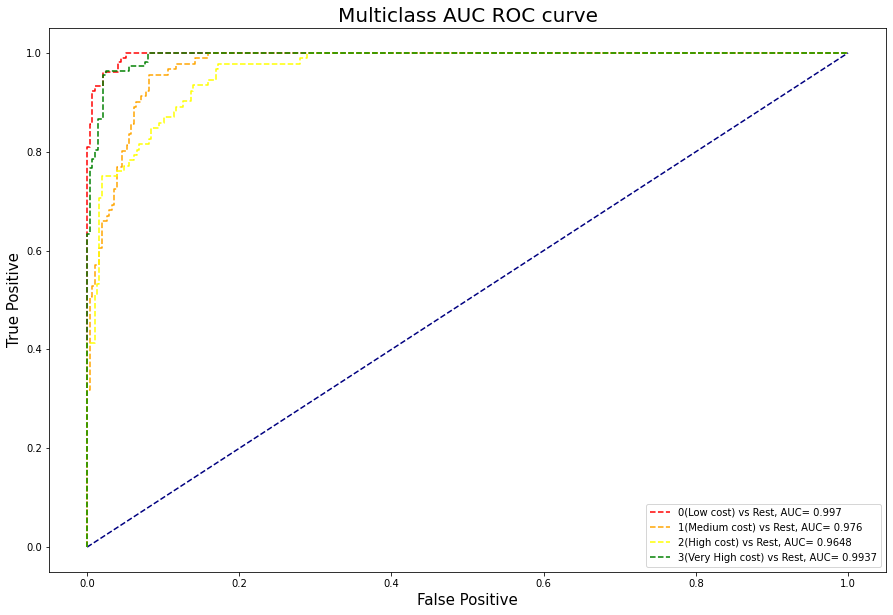

In [ ]:
print_roc(svm_model,'roc',scale=1)



*   There is a improvemengt in accuracy after cross validation
*   Accuracy on both test and train data after cross validation and tuning is 91 percent 



# KNN

In [ ]:
#defining a variable for knn
knn= KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
test_class_pred=knn.predict(x_test_scaled)
train_class_pred=knn.predict(x_train_scaled)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.67375
The accuracy on test data is  0.555


In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       105
           1       0.36      0.38      0.37        91
           2       0.36      0.43      0.40        92
           3       0.77      0.54      0.63       112

    accuracy                           0.53       400
   macro avg       0.54      0.52      0.53       400
weighted avg       0.56      0.53      0.54       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       395
           1       0.56      0.60      0.58       409
           2       0.59      0.57      0.58       408
           3       0.84      0.69      0.76       388

    accuracy                           0.67      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.67      0.67      1600



[[83 19  3  0]
 [30 36 24  1]
 [ 5 38 39 10]
 [ 2  4 42 64]]


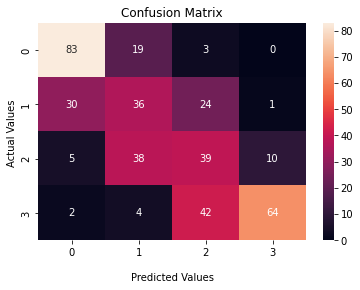

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       105
           1       0.37      0.40      0.38        91
           2       0.36      0.42      0.39        92
           3       0.85      0.57      0.68       112

    accuracy                           0.56       400
   macro avg       0.57      0.55      0.55       400
weighted avg       0.59      0.56      0.56       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       395
           1       0.56      0.60      0.58       409
           2       0.59      0.57      0.58       408
           3       0.84      0.69      0.76       388

    accuracy                           0.67      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.67      0.67      1600



# Cross validation and hyperparameter tuning on KNN

In [ ]:
#Parameter tuning
leaf_size = list(range(1,20))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [ ]:
grid_search = GridSearchCV(estimator=knn, 
                           param_grid=hyperparameters,
                           cv=2, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(x_train_scaled,y_train)

Fitting 2 folds for each of 1102 candidates, totalling 2204 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 29, 'p': 1}

In [ ]:
grid_search.best_score_

0.618125

In [ ]:
cv_accuracy= cross_val_score(grid_search, x_train_scaled, y_train ,scoring='accuracy',cv=2)

Fitting 2 folds for each of 1102 candidates, totalling 2204 fits
Fitting 2 folds for each of 1102 candidates, totalling 2204 fits


In [ ]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.6175


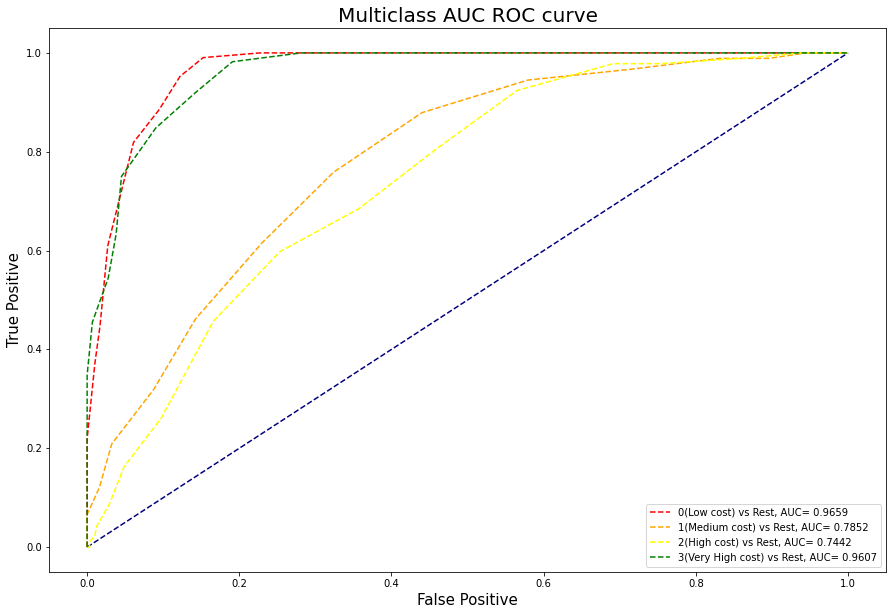

In [ ]:
print_roc(grid_search,'roc',scale=1)



*   The accuracy in prediction by using KNN is less while comparing it with other three models
*   Accuracte predictions is better for price range 0 and 3



# **Conclusion**



> In EDA there were colomns/features that were inter-related and we engineering new features using them.





> ram and batter_power has the highest impact on price_range.




> Using logistic regeression feature importance we came to understand that some of the columns were not relivant or had no impact negative/positive.



Hence they were dropped.



> We, implemented various classification algorithms, Logistics and SVM acurracy was simlar.




> Logistic regression classification model gave best results after hyper-parameter tuning with 91.5% train accuracy and 89.2% test accuracy score.





> SVM(Support vector machine) algorithm also gave equally best accuracy after hyper-parameter tuning with 91.6% train accuracy and 89.2 % test accuracy.




> Random Forest was Over-fitting






> KNN after optimisation performed very well but for mutli class price_range the prediction of price_range = 2 was lowered than Logistic and SVM in comparission.




> We will go forward with Logistic regression classification model as using it increases the explainability of price_rage as per business requirement.

